# How much would you pay for clean air? 

![house-price.png](https://github.com/jeannefukumaru/pycon-apac2018/raw/master/demo/notebooks/house-price.png)

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import shap
import pandas as pd 
import altair as alt

In [2]:
shap.initjs()

In [3]:
df = pd.read_csv('../data/raw/housing.txt', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
type(df)

pandas.core.frame.DataFrame

# data seems to be somewhat right-skewed, which could be a problem later

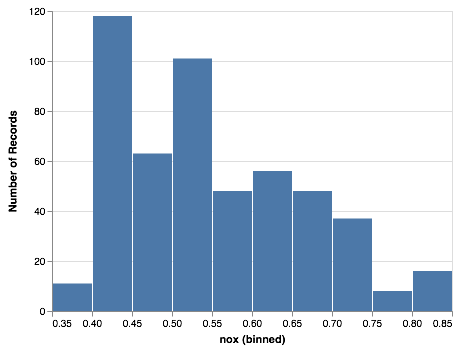

In [5]:
alt.Chart(df).mark_bar().encode(
    alt.X('nox', bin=True),
    alt.Y('count()')
)

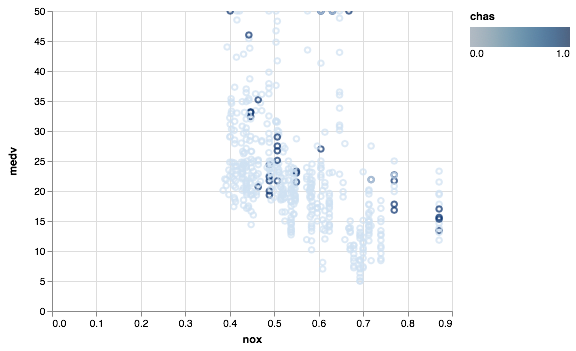

In [7]:
alt.Chart(df).mark_point().encode(
    x='nox',
    y='medv', color='chas').interactive()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(*shap.datasets.boston(), test_size=0.2, random_state=0)

In [16]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


In [71]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score 
lm_one = linear_model.LinearRegression()

In [72]:
# some feature engineering
# use only one feature
x_nox = X_train['NOX'].values.reshape(-1, 1)

In [73]:
lm_one.fit(x_nox, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

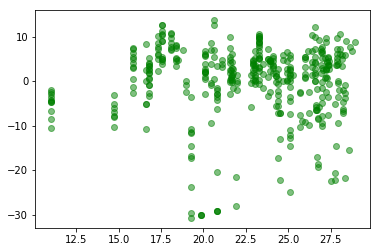

In [75]:
# plot residuals
plt.scatter(lm_one.predict(x_nox), lm_one.predict(x_nox)-y_train, c='g', alpha=0.5)

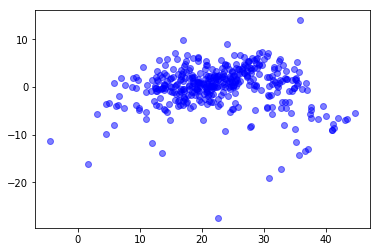

In [86]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
plt.scatter(lm.predict(X_train), lm.predict(X_train)-y_train, c='b', alpha=0.5)

# save model

# model interpretability

In [9]:
model = RandomForestRegressor(n_estimators=1000, max_depth=4)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [10]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_test, nsamples=100)

100%|██████████| 102/102 [02:09<00:00,  1.27s/it]


In [87]:
# visualize the first prediction's explanation
shap.force_plot(shap_values[0,:], X_train.iloc[0,:])

In [88]:
#visualise training set predictions
shap.force_plot(shap_values, X_train)